In [26]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Load the dataset
df = pd.read_csv('waveform.csv')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5000, 22)
   Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0    -1.23    -1.56    -1.75    -0.28     0.60     2.22     0.85     0.21   
1    -0.69     2.43     0.61     2.08     2.30     3.25     5.52     4.55   
2    -0.12    -0.94     1.29     2.59     2.42     3.55     4.94     3.25   
3     0.86     0.29     2.19    -0.02     1.13     2.51     2.37     5.45   
4     1.16     0.37     0.40    -0.59     2.66     1.00     2.69     4.06   

   Column9  Column10  ...  Column13  Column14  Column15  Column16  Column17  \
0    -0.20      0.89  ...      2.89      7.75      4.59      3.15      5.12   
1     2.97      2.22  ...      1.24      1.89      1.88     -1.34      0.83   
2     1.90      2.07  ...      2.50      0.12      1.41      2.78      0.64   
3     5.45      4.84  ...      2.58      1.40      1.24      1.41      1.07   
4     5.34      3.53  ...      4.30      1.84      1.73      0.21     -0.18   

   Column18  Column19  Column20  Col

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#train test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#for SVM model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#the models
available_models = {
    "1": ("Logistic Regression", LogisticRegression(max_iter=1000)),
    "2": ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    "3": ("Support Vector Machine", SVC(kernel='rbf', probability=True, random_state=42)),
    "4": ("Gradient Boosting (XGBoost)", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    "5": ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
}


Select models to evaluate (e.g., 1 3 5):
1. Logistic Regression
2. Random Forest
3. Support Vector Machine
4. Gradient Boosting (XGBoost)
5. K-Nearest Neighbors
Your selection: 2

 Training: Random Forest

🧾 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       497
           1       0.85      0.86      0.86       494
           2       0.83      0.92      0.87       509

    accuracy                           0.86      1500
   macro avg       0.86      0.85      0.85      1500
weighted avg       0.86      0.86      0.85      1500



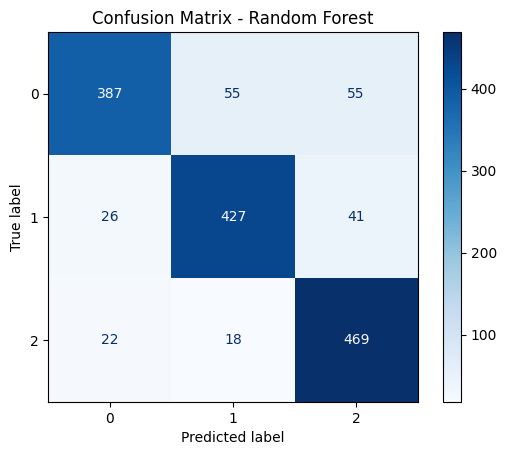


📈 Summary of Selected Models:

           Model  Accuracy  Precision
0  Random Forest  0.855333     0.8577


In [29]:
print("\nSelect models to evaluate (e.g., 1 3 5):")
for key, (name, _) in available_models.items():
    print(f"{key}. {name}")
selected_keys = input("Your selection: ").split()

selected_models = {available_models[k][0]: available_models[k][1] for k in selected_keys if k in available_models}
results = []

for name, model in selected_models.items():
    print(f"\n Training: {name}")
    use_scaled = name in ["Support Vector Machine", "Logistic Regression", "K-Nearest Neighbors"]
    X_train_input = X_train_scaled if use_scaled else X_train
    X_test_input = X_test_scaled if use_scaled else X_test

    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    results.append((name, accuracy, precision))
    print(f"\n🧾 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

result_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision'])
print("\n📈 Summary of Selected Models:\n")
print(result_df.sort_values(by="Accuracy", ascending=False))

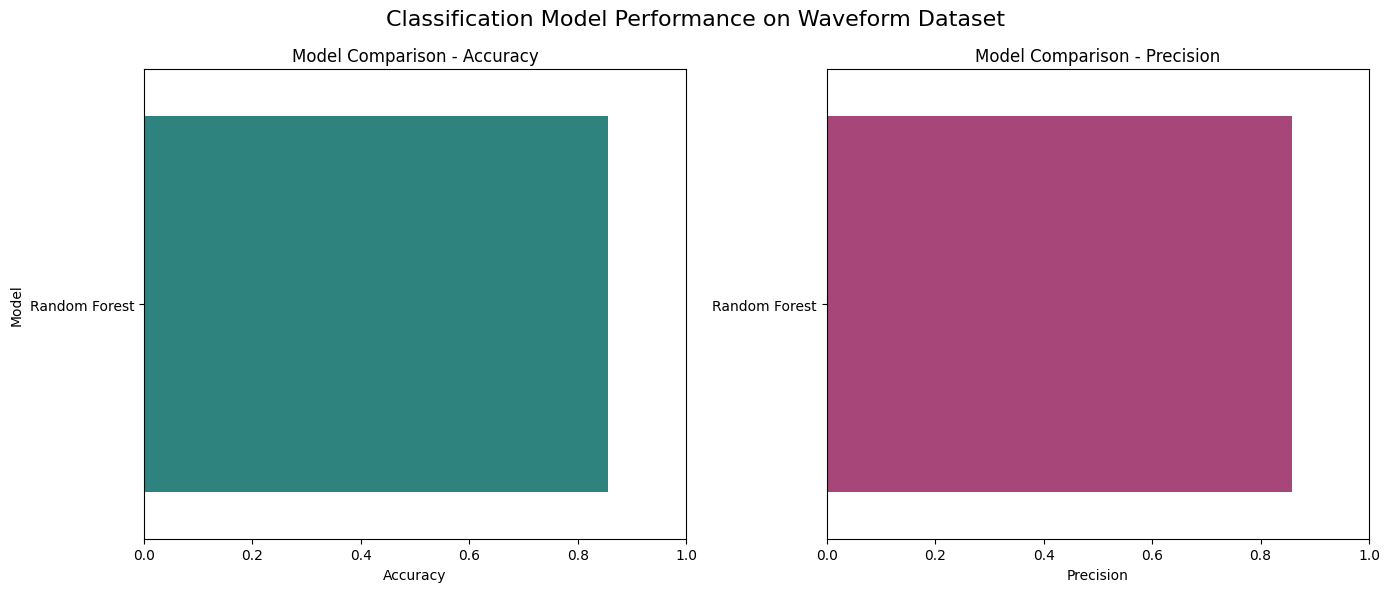

In [30]:
#graphs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=result_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.subplot(1, 2, 2)
sns.barplot(data=result_df, x='Precision', y='Model', palette='magma')
plt.title('Model Comparison - Precision')
plt.xlim(0, 1)
plt.xlabel('Precision')
plt.ylabel('')

plt.suptitle('Classification Model Performance on Waveform Dataset', fontsize=16)
plt.tight_layout()
plt.show()